In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                  shear_range=0.2,horizontal_flip=True,rescale=1/255.0,validation_split=0.2)
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [17]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
#model.add(BatchNormalization())
#model.add(Conv2D(64,(3,3),activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(BatchNormalization())
#model.add(Conv2D(128,(3,3),activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(26,activation="softmax"))



In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               819456    
_________________________________________________________________
dense_4 (Dense)              (None, 26)               

In [20]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')==1.0):
      print("\nReached 100.0% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [21]:
history=model.fit(traindata_generator,epochs=100,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/100
687/687 [==============================] - 15s 21ms/step - loss: 2.8203 - accuracy: 0.1481 - val_loss: 2.6902 - val_accuracy: 0.2393
Epoch 2/100
687/687 [==============================] - 12s 18ms/step - loss: 2.0639 - accuracy: 0.3432 - val_loss: 2.0134 - val_accuracy: 0.4121
Epoch 3/100
687/687 [==============================] - 14s 20ms/step - loss: 1.6581 - accuracy: 0.4661 - val_loss: 1.6379 - val_accuracy: 0.4839
Epoch 4/100
687/687 [==============================] - 14s 20ms/step - loss: 1.4025 - accuracy: 0.5398 - val_loss: 1.1574 - val_accuracy: 0.5433
Epoch 5/100
687/687 [==============================] - 12s 18ms/step - loss: 1.2399 - accuracy: 0.5848 - val_loss: 1.4482 - val_accuracy: 0.6252
Epoch 6/100
687/687 [==============================] - 12s 17ms/step - loss: 1.1058 - accuracy: 0.6297 - val_loss: 1.0599 - val_accuracy: 0.6605
Epoch 7/100
687/687 [==============================] - 12s 18ms/step - loss: 0.9928 - accuracy: 0.6670 - val_loss: 0.6305 - val_ac

Epoch 58/100
687/687 [==============================] - 6s 9ms/step - loss: 0.2567 - accuracy: 0.9150 - val_loss: 0.8120 - val_accuracy: 0.9069
Epoch 59/100
687/687 [==============================] - 6s 9ms/step - loss: 0.2569 - accuracy: 0.9147 - val_loss: 0.4585 - val_accuracy: 0.9226
Epoch 60/100
687/687 [==============================] - 7s 10ms/step - loss: 0.2537 - accuracy: 0.9156 - val_loss: 0.2882 - val_accuracy: 0.9066
Epoch 61/100
687/687 [==============================] - 6s 9ms/step - loss: 0.2457 - accuracy: 0.9180 - val_loss: 0.3181 - val_accuracy: 0.9126
Epoch 62/100
687/687 [==============================] - 6s 9ms/step - loss: 0.2535 - accuracy: 0.9155 - val_loss: 0.3568 - val_accuracy: 0.9173
Epoch 63/100
687/687 [==============================] - 7s 10ms/step - loss: 0.2364 - accuracy: 0.9228 - val_loss: 0.1075 - val_accuracy: 0.9144
Epoch 64/100
687/687 [==============================] - 6s 9ms/step - loss: 0.2468 - accuracy: 0.9184 - val_loss: 0.1441 - val_accurac

In [24]:
model.evaluate_generator(testdata_generator)[1]

0.9797824621200562

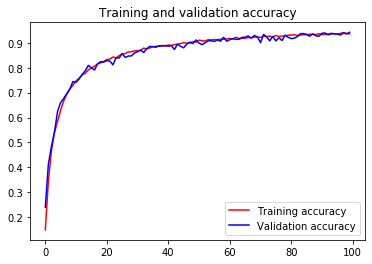

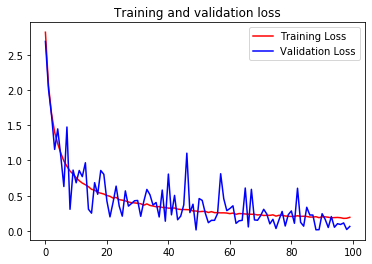

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()